In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/Users/alexfallon/Downloads/titanic.csv'
titanic_data = pd.read_csv(file_path)
print(titanic_data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [31]:
total_passengers = len(titanic_data)
male_percentage = (titanic_data['Sex'].mean() * 100) 
survival_percentage = (titanic_data['Survived'].mean() * 100)

print(f"Total passengers: {total_passengers}")
print(f"Percentage of male passengers: {male_percentage:.2f}%")
print(f"Percentage of passengers who survived: {survival_percentage:.2f}%")

Total passengers: 891
Percentage of male passengers: 64.76%
Percentage of passengers who survived: 38.38%


Your written answer:

 - <Answer 1>
 - <Answer 2>
 - <Answer 3>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [33]:
female_survival_percentage = titanic_data[titanic_data['Sex'] == 0]['Survived'].mean() * 100
male_survival_percentage = titanic_data[titanic_data['Sex'] == 1]['Survived'].mean() * 100
print(f"Percentage of female passengers who survived: {female_survival_percentage:.2f}%")
print(f"Percentage of male passengers who survived: {male_survival_percentage:.2f}%")

Percentage of female passengers who survived: 74.20%
Percentage of male passengers who survived: 18.89%


Your written answer:

 - 74.2%
 - 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [37]:
class_stats = titanic_data.groupby('Pclass').agg(
    total_tickets=('Pclass', 'size'),
    survivorship=('Survived', 'mean'))

class_stats['ticket_percentage'] = (class_stats['total_tickets'] / len(titanic_data)) * 100
class_stats['survivorship_percentage'] = class_stats['survivorship'] * 100
class_stats = class_stats[['ticket_percentage', 'survivorship_percentage']]
print(class_stats)

        ticket_percentage  survivorship_percentage
Pclass                                            
1               24.242424                62.962963
2               20.650954                47.282609
3               55.106622                24.236253


Your written answer:

 - Class 1 
    - 24.24%
    - 62.96% 
- Class 2 
    - 20.65%:
    - 47.28% 
- Class 3
    - 55.1%
    - 24.24% 


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

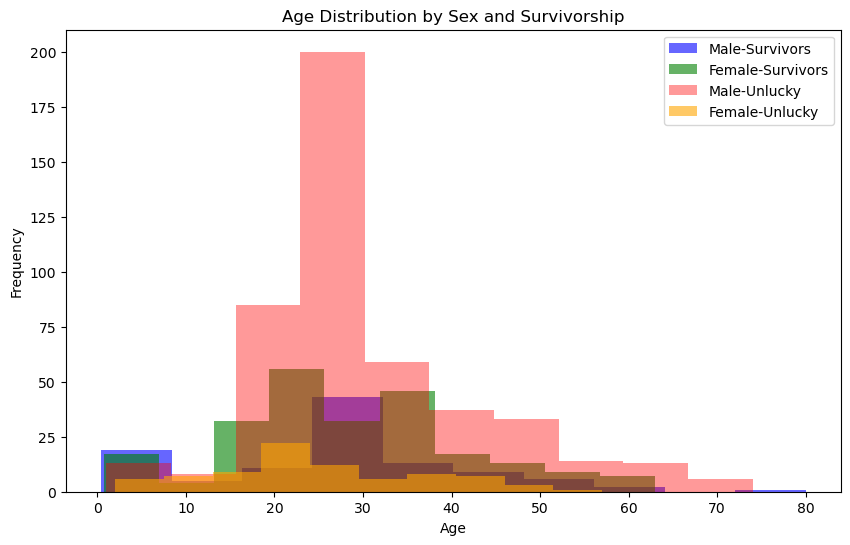

(    Age                                               Name  Sex
 1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
 2  26.0                             Heikkinen, Miss. Laina    0
 3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
 8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
 9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0,
     Age                            Name  Sex
 0  22.0         Braund, Mr. Owen Harris    1
 4  35.0        Allen, Mr. William Henry    1
 5  30.0                Moran, Mr. James    1
 6  54.0         McCarthy, Mr. Timothy J    1
 7   2.0  Palsson, Master. Gosta Leonard    1)

In [61]:
import matplotlib.pyplot as plt

survivors_df = titanic_data[titanic_data['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors_df = titanic_data[titanic_data['Survived'] == 0][['Age', 'Name', 'Sex']]
survivors_head = survivors_df.head()
non_survivors_head = non_survivors_df.head()

plt.figure(figsize=(10, 6))
plt.hist(
    survivors_df[survivors_df['Sex'] == 1]['Age'].dropna(), 
    bins=10, alpha=0.6, label='Male-Survivors', color='blue', histtype='stepfilled')
plt.hist(
    survivors_df[survivors_df['Sex'] == 0]['Age'].dropna(), 
    bins=10, alpha=0.6, label='Female-Survivors', color='green', histtype='stepfilled')
plt.hist(
    non_survivors_df[non_survivors_df['Sex'] == 1]['Age'].dropna(), 
    bins=10, alpha=0.4, label='Male-Unlucky', color='red', histtype='stepfilled')
plt.hist(
    non_survivors_df[non_survivors_df['Sex'] == 0]['Age'].dropna(), 
    bins=10, alpha=0.6, label='Female-Unlucky', color='orange', histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend(loc='upper right')

plt.show()

survivors_head, non_survivors_head

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/Users/alexfallon/Downloads/titanic.csv'
titanic_data = pd.read_csv(file_path)
print(titanic_data.head())



    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

In [150]:
label = ['Survived']
features = ['Sex', 'Age', 'Pclass','Family_Size']
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_data[features], titanic_data[label],test_size=0.2)

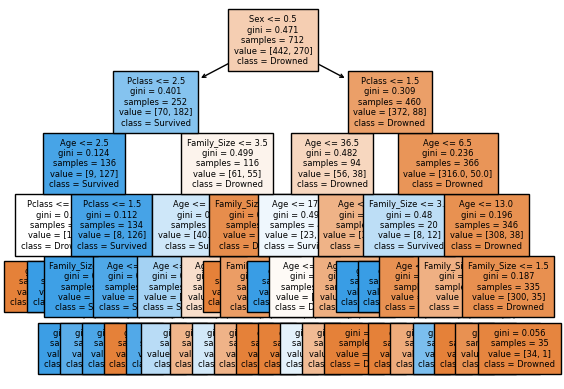

In [176]:
tree_clf = DecisionTreeClassifier(max_depth = 5)
tree_clf.fit(X_train, y_train) 

plot_tree(tree_clf, feature_names = features, class_names = ['Drowned', 'Survived'],
          filled= True, fontsize=6)
plt.show()
#tree_clf.__dict__

<function matplotlib.pyplot.show(close=None, block=None)>

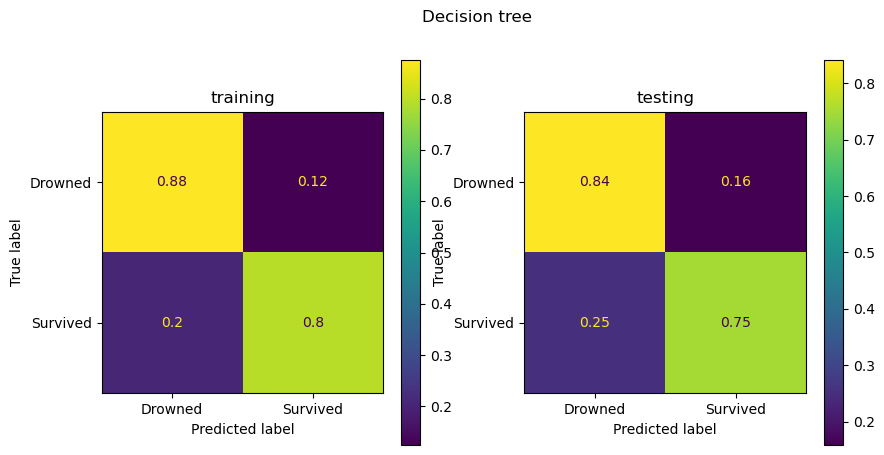

In [178]:
from sklearn.metrics import ConfusionMatrixDisplay
y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train,y_tree_train, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[0])

ConfusionMatrixDisplay.from_predictions(y_test,y_tree_test, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('Decision tree')
plt.show



#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

In [188]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(X_train)

Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test = y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors = 15)
knn_clf.fit(Xs_train, ys_train)

KNeighborsClassifier(n_neighbors=15)

<function matplotlib.pyplot.show(close=None, block=None)>

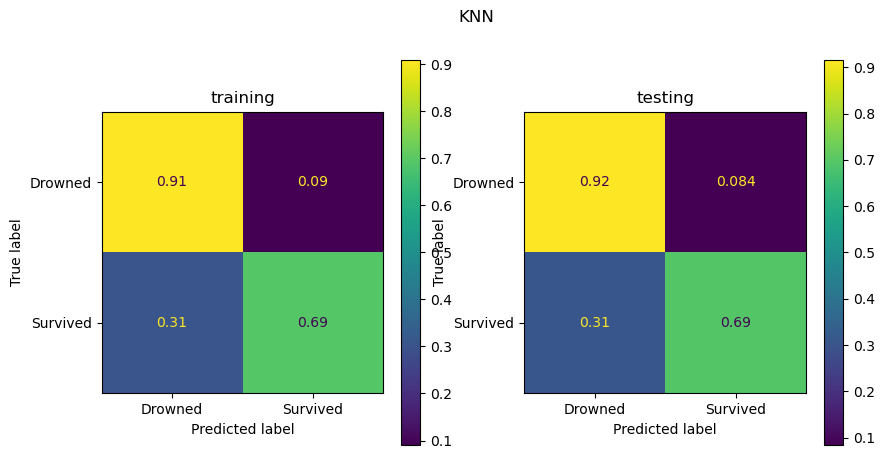

In [192]:
y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

fig, ax = plt.subplots(1,2, figsize = (10,5))

ConfusionMatrixDisplay.from_predictions(y_train,y_knn_train, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[0])

ConfusionMatrixDisplay.from_predictions(y_test,y_knn_test, 
                                        normalize = 'true',
                                        display_labels =['Drowned', 'Survived'],
                                        ax =ax[1])
ax[0].set_title('training')
ax[1].set_title('testing')
fig.suptitle('KNN')
plt.show

Questions

How does the model performance on the test data compare to the performance on the training data? 

Which models did you fit and which worked better? 

In [196]:
#The model performed better on training than on the testing. It more accurately categorized the people on the titanic by whether they survived or drowned. 

In [ ]:
#Overall, the decision tree worked better. For testing drowned passengers, KNN performed better than the tree. As for the survived passengers, the decision tree performed much better than KNN.